<center><h1><b><u>BA2MOTIFS</u></b></h1></center>

## __Importing Libraries, Classes, and Functions__

In [76]:
#BA2MOTIFS graph from scratch
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx #focuses on network analysis and graph theory; can create/visualize graphs
import inspect #for viewing source code
import pprint

#Custom BA Motif
from torch_geometric.utils import to_networkx
from torch_geometric.datasets import ExplainerDataset
from torch_geometric.datasets.graph_generator import BAGraph
from torch_geometric.utils import to_networkx
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.datasets.motif_generator import HouseMotif, CycleMotif

#BA2MOTIFS

## __Viewing Source Code__

In [77]:
source_code = inspect.getsource(ExplainerDataset)

#with open('../source.py', 'w') as file:
    #file.write(source_code)

## __Visualizing BA Graph__

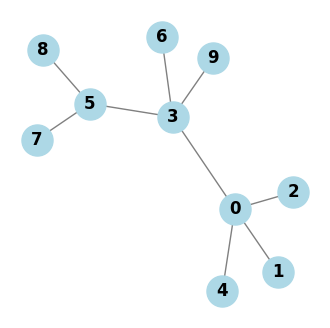

In [78]:
G = nx.barabasi_albert_graph(10, 1)

# Draw the graph
pos = nx.spring_layout(G)
plt.figure(figsize=(4, 4))
plt.axis('off')
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_weight='bold')
plt.show()

## __Custom BA Motif Dataset__

In [85]:
house = ExplainerDataset(
    graph_generator=BAGraph(num_nodes=5, num_edges=1),
    motif_generator=HouseMotif(),
    num_motifs=1,
    num_graphs=500,
)

cycle = ExplainerDataset(
    graph_generator=BAGraph(num_nodes=5, num_edges=1),
    motif_generator=CycleMotif(6),
    num_motifs=1,
    num_graphs=500,
)

In [86]:
def visualize_graph(graph, position, title):
    G = to_networkx(graph, to_undirected=True)
    pos1 = nx.spring_layout(G)
    nx.draw(G, pos1, ax=position, with_labels=True, node_color='lightblue' if title == 'House' else 'lightgreen', node_size=500, font_size=10, font_weight='bold')
    position.set_title(title)
    

def side_by_side(graph1, graph2, title1='', title2=''):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
    
    visualize_graph(graph1, ax1, title1)
    visualize_graph(graph2, ax2, title2)
    
    plt.tight_layout()
    plt.show()

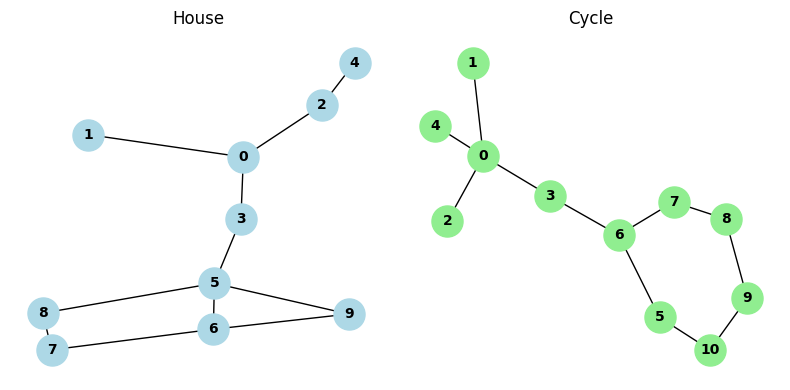

In [87]:
idx = 0
side_by_side(house[idx], cycle[idx], 'House', 'Cycle')